In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import importance method
from sklearn.inspection import permutation_importance

# import model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, accuracy_score
from sklearn import svm

# import evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Load dataset

In [2]:
df_moca = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/moca.csv')
df_moca.describe()

,MoCA 1a,MoCA 1b,MoCA 1c,MoCA 1T,MoCA 2,MoCA 3 1a,MoCA 3 1b,MoCA 3 1T,MoCA 3 2,MoCA 3 3,MoCA 4 1,MoCA 4 2,MoCA 5,MoCA 6,MoCA 7,MoCA Total,Disease State
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1612.000000,1612.000000
mean,0.413642,0.294743,1.779725,2.486859,2.102003,0.880476,0.579474,1.461202,0.719650,2.119524,1.831039,0.658949,0.461202,1.290989,4.678974,18.406328,0.263027
std,0.492640,0.464235,1.009182,1.582470,0.993521,0.324506,0.493798,0.641448,0.449311,0.958817,0.440854,0.476845,0.653057,1.598310,1.835146,6.358465,0.440414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,4.000000,14.000000,0.000000
50%,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,6.000000,19.000000,0.000000
75%,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.750000,6.000000,24.000000,1.000000
max,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,7.000000,30.000000,1.000000


In [3]:
df_drawing = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/drawing.csv')
df_moca.describe()

,MoCA 1a,MoCA 1b,MoCA 1c,MoCA 1T,MoCA 2,MoCA 3 1a,MoCA 3 1b,MoCA 3 1T,MoCA 3 2,MoCA 3 3,MoCA 4 1,MoCA 4 2,MoCA 5,MoCA 6,MoCA 7,MoCA Total,Disease State
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1612.000000,1612.000000
mean,0.413642,0.294743,1.779725,2.486859,2.102003,0.880476,0.579474,1.461202,0.719650,2.119524,1.831039,0.658949,0.461202,1.290989,4.678974,18.406328,0.263027
std,0.492640,0.464235,1.009182,1.582470,0.993521,0.324506,0.493798,0.641448,0.449311,0.958817,0.440854,0.476845,0.653057,1.598310,1.835146,6.358465,0.440414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,4.000000,14.000000,0.000000
50%,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,6.000000,19.000000,0.000000
75%,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.750000,6.000000,24.000000,1.000000
max,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,7.000000,30.000000,1.000000


In [4]:
df_comb = pd.read_csv('/content/drive/MyDrive/dementia project/dataset/combine.csv')
df_comb.describe()

,MoCA 1a,MoCA 1b,MoCA 1c,MoCA 1T,MoCA 2,MoCA 3 1a,MoCA 3 1b,MoCA 3 1T,MoCA 3 2,MoCA 3 3,...,ids-std,dsp-avg,dsp-med,dsp-max,dsp-std,dss-avg,dss-min,dss-max,dss-std,Disease State
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,...,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000
mean,0.413642,0.294743,1.779725,2.486859,2.102003,0.880476,0.579474,1.461202,0.719650,2.119524,...,0.317450,2.185050,1.152871,66.058236,4.840612,3.631204,1.135500,15.811183,4.201986,0.263027
std,0.492640,0.464235,1.009182,1.582470,0.993521,0.324506,0.493798,0.641448,0.449311,0.958817,...,0.255430,27.853490,14.358145,1750.621401,107.986825,80.207324,14.378503,525.357829,146.109939,0.440414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.057582,0.000000,0.622576,0.075326,0.048369,0.001885,0.066966,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,...,0.131265,0.253688,0.138709,2.261405,0.296091,0.241820,0.113012,0.377145,0.062876,0.000000
50%,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,...,0.245941,0.355168,0.202433,3.376686,0.430078,0.348120,0.183382,0.556488,0.112435,0.000000
75%,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,0.428448,0.500424,0.309575,5.473162,0.653677,0.506256,0.301385,0.842289,0.186101,1.000000
max,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,1.399184,681.297853,288.589350,69653.165920,4208.143953,3097.545809,351.830262,21049.918560,5859.114821,1.000000


In [118]:
# define a function to show boxplot to check the distribution and outliers
def box(df, title):
  plt.figure(figsize = (12, 4.5))
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.boxplot(data = df, showfliers = False)
  plt.show()

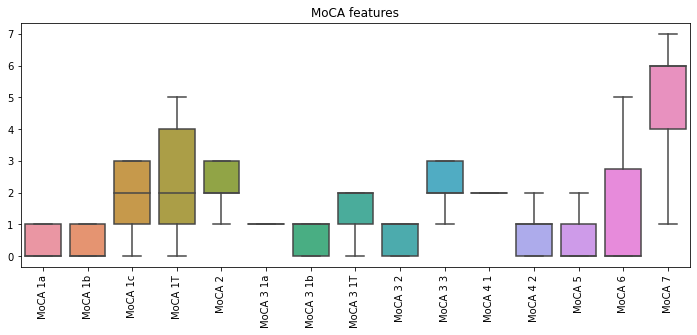

In [119]:
box(df_moca.drop(['MoCA Total', 'Disease State'], axis = 1), 'MoCA features')

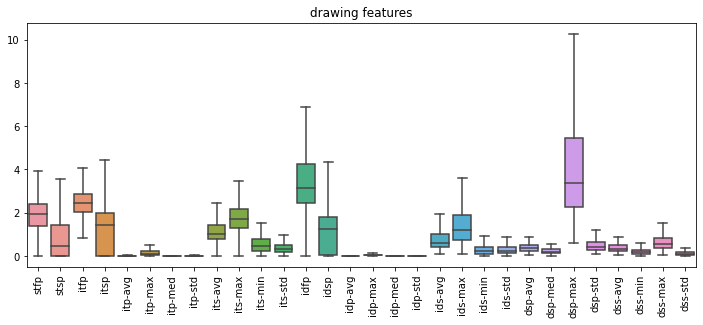

In [120]:
box(df_drawing.drop('Disease State', axis = 1), 'drawing features')

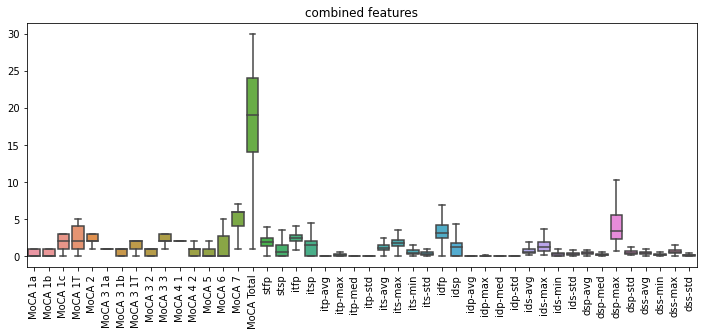

In [121]:
box(df_comb.drop('Disease State', axis = 1), 'combined features')

# Data preprocessing

Data cleaning

In [5]:
# check the missing values in moca data
df_moca.isnull().sum()

MoCA 1a          14
MoCA 1b          14
MoCA 1c          14
MoCA 1T          14
MoCA 2           14
MoCA 3 1a        14
MoCA 3 1b        14
MoCA 3 1T        14
MoCA 3 2         14
MoCA 3 3         14
MoCA 4 1         14
MoCA 4 2         14
MoCA 5           14
MoCA 6           14
MoCA 7           14
MoCA Total        0
Disease State     0
dtype: int64

In [6]:
# check the missing value of drawing data
df_drawing.isnull().sum()

stfp             0
stsp             0
itfp             0
itsp             0
itp-avg          0
itp-max          0
itp-med          0
itp-std          0
its-avg          0
its-max          0
its-min          0
its-std          0
idfp             0
idsp             0
idp-avg          0
idp-max          0
idp-med          0
idp-std          0
ids-avg          0
ids-max          0
ids-min          0
ids-std          0
dsp-avg          0
dsp-med          0
dsp-max          0
dsp-std          0
dss-avg          0
dss-min          0
dss-max          0
dss-std          0
Disease State    0
dtype: int64

In [7]:
# check the missing value of combined data
df_comb.isnull().sum()

MoCA 1a          14
MoCA 1b          14
MoCA 1c          14
MoCA 1T          14
MoCA 2           14
MoCA 3 1a        14
MoCA 3 1b        14
MoCA 3 1T        14
MoCA 3 2         14
MoCA 3 3         14
MoCA 4 1         14
MoCA 4 2         14
MoCA 5           14
MoCA 6           14
MoCA 7           14
MoCA Total        0
stfp              0
stsp              0
itfp              0
itsp              0
itp-avg           0
itp-max           0
itp-med           0
itp-std           0
its-avg           0
its-max           0
its-min           0
its-std           0
idfp              0
idsp              0
idp-avg           0
idp-max           0
idp-med           0
idp-std           0
ids-avg           0
ids-max           0
ids-min           0
ids-std           0
dsp-avg           0
dsp-med           0
dsp-max           0
dsp-std           0
dss-avg           0
dss-min           0
dss-max           0
dss-std           0
Disease State     0
dtype: int64

In [8]:
# eliminate the samples with missing values
df_moca.dropna(axis = 0, how = 'any', inplace = True)
df_comb.dropna(axis = 0, how = 'any', inplace = True)

In [9]:
df_moca.isnull().sum()

MoCA 1a          0
MoCA 1b          0
MoCA 1c          0
MoCA 1T          0
MoCA 2           0
MoCA 3 1a        0
MoCA 3 1b        0
MoCA 3 1T        0
MoCA 3 2         0
MoCA 3 3         0
MoCA 4 1         0
MoCA 4 2         0
MoCA 5           0
MoCA 6           0
MoCA 7           0
MoCA Total       0
Disease State    0
dtype: int64

In [10]:
df_comb.isnull().sum()

MoCA 1a          0
MoCA 1b          0
MoCA 1c          0
MoCA 1T          0
MoCA 2           0
MoCA 3 1a        0
MoCA 3 1b        0
MoCA 3 1T        0
MoCA 3 2         0
MoCA 3 3         0
MoCA 4 1         0
MoCA 4 2         0
MoCA 5           0
MoCA 6           0
MoCA 7           0
MoCA Total       0
stfp             0
stsp             0
itfp             0
itsp             0
itp-avg          0
itp-max          0
itp-med          0
itp-std          0
its-avg          0
its-max          0
its-min          0
its-std          0
idfp             0
idsp             0
idp-avg          0
idp-max          0
idp-med          0
idp-std          0
ids-avg          0
ids-max          0
ids-min          0
ids-std          0
dsp-avg          0
dsp-med          0
dsp-max          0
dsp-std          0
dss-avg          0
dss-min          0
dss-max          0
dss-std          0
Disease State    0
dtype: int64

Check the distribution of the data

In [11]:
# get the names of the moca features
moca_col = list(df_moca.drop('Disease State', axis = 1).columns)
moca_col

['MoCA 1a',
 'MoCA 1b',
 'MoCA 1c',
 'MoCA 1T',
 'MoCA 2',
 'MoCA 3 1a',
 'MoCA 3 1b',
 'MoCA 3 1T',
 'MoCA 3 2',
 'MoCA 3 3',
 'MoCA 4 1',
 'MoCA 4 2',
 'MoCA 5',
 'MoCA 6',
 'MoCA 7',
 'MoCA Total']

In [12]:
# get the names of the drawing features
drawing_col = list(df_drawing.drop('Disease State', axis = 1).columns)
drawing_col

['stfp',
 'stsp',
 'itfp',
 'itsp',
 'itp-avg',
 'itp-max',
 'itp-med',
 'itp-std',
 'its-avg',
 'its-max',
 'its-min',
 'its-std',
 'idfp',
 'idsp',
 'idp-avg',
 'idp-max',
 'idp-med',
 'idp-std',
 'ids-avg',
 'ids-max',
 'ids-min',
 'ids-std',
 'dsp-avg',
 'dsp-med',
 'dsp-max',
 'dsp-std',
 'dss-avg',
 'dss-min',
 'dss-max',
 'dss-std']

In [13]:
# get the names of the combined features
comb_col = list(df_comb.drop('Disease State', axis = 1).columns)
comb_col

['MoCA 1a',
 'MoCA 1b',
 'MoCA 1c',
 'MoCA 1T',
 'MoCA 2',
 'MoCA 3 1a',
 'MoCA 3 1b',
 'MoCA 3 1T',
 'MoCA 3 2',
 'MoCA 3 3',
 'MoCA 4 1',
 'MoCA 4 2',
 'MoCA 5',
 'MoCA 6',
 'MoCA 7',
 'MoCA Total',
 'stfp',
 'stsp',
 'itfp',
 'itsp',
 'itp-avg',
 'itp-max',
 'itp-med',
 'itp-std',
 'its-avg',
 'its-max',
 'its-min',
 'its-std',
 'idfp',
 'idsp',
 'idp-avg',
 'idp-max',
 'idp-med',
 'idp-std',
 'ids-avg',
 'ids-max',
 'ids-min',
 'ids-std',
 'dsp-avg',
 'dsp-med',
 'dsp-max',
 'dsp-std',
 'dss-avg',
 'dss-min',
 'dss-max',
 'dss-std']

In [14]:
# define a function to plot the histogram to visualize the distribution of the moca features
def distribution(df, index):
  if df.columns[-1] == 'Disease State':
    df = df.drop('Disease State', axis = 1)
  for i in index:
    plt.figure(figsize = (8, 4.5))
    plt.hist(df[i])
    plt.xlabel('level of data')
    plt.ylabel('number of samples')
    plt.title(i)

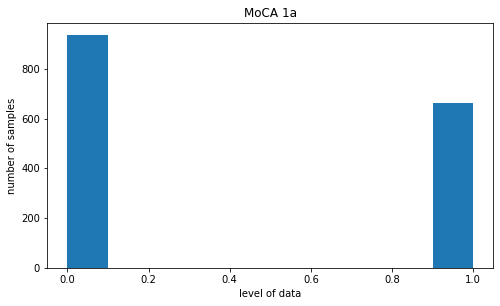

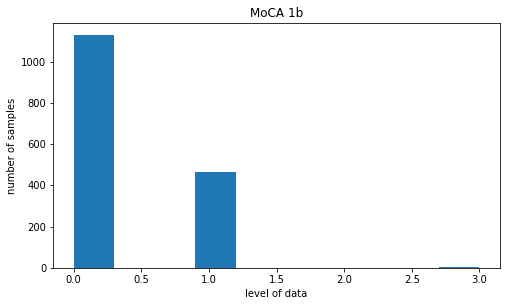

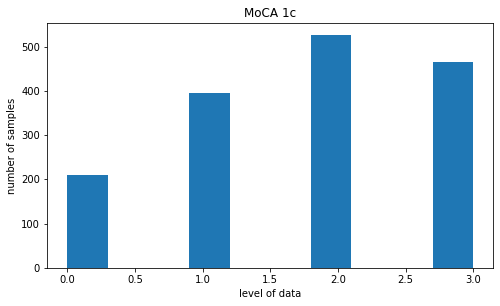

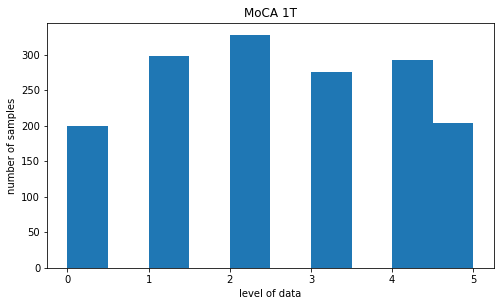

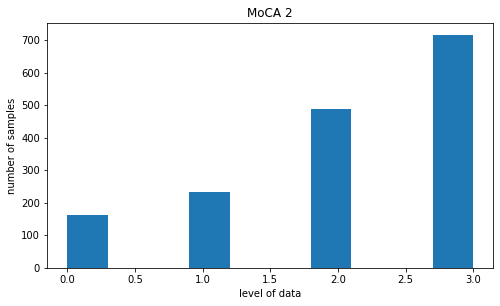

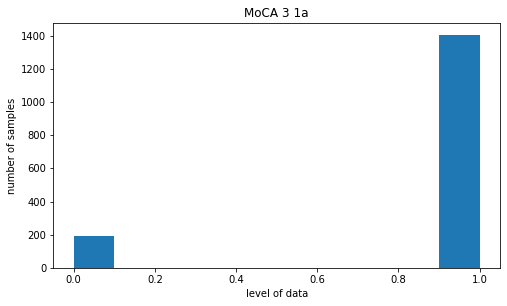

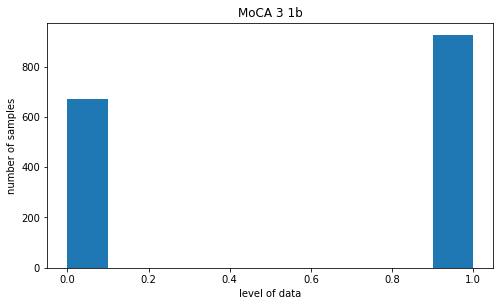

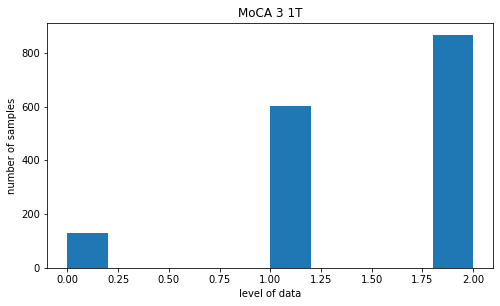

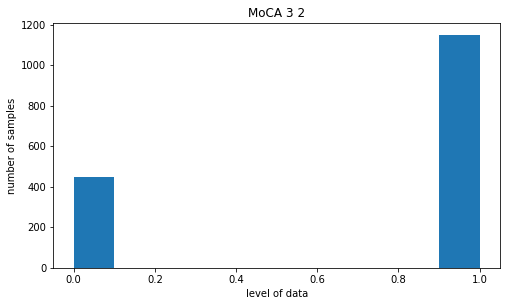

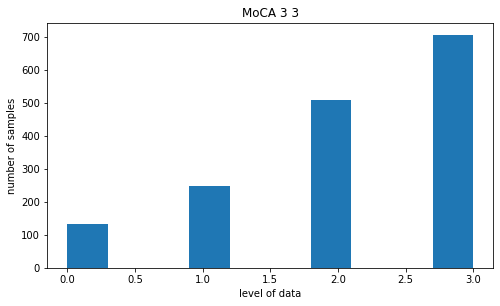

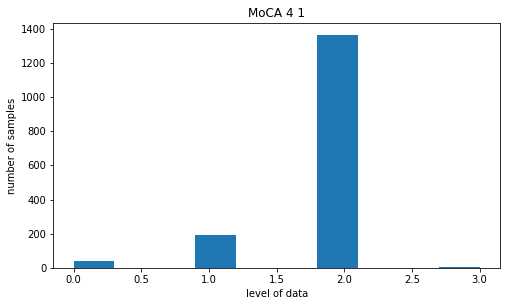

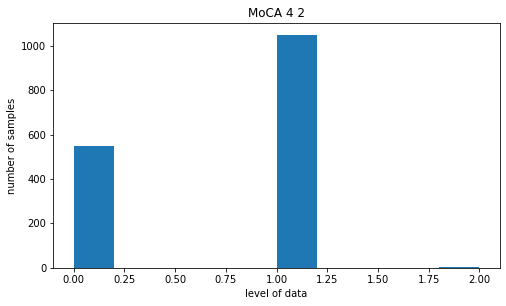

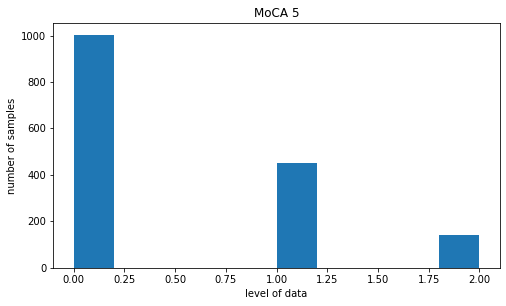

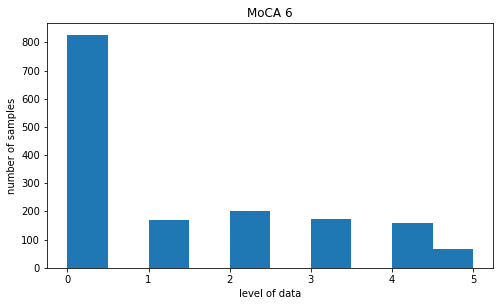

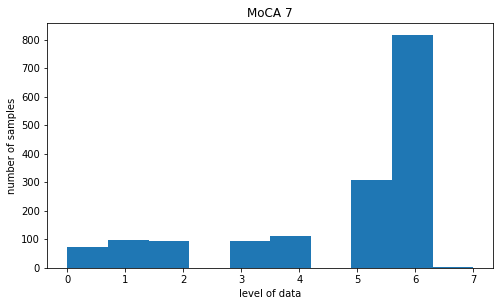

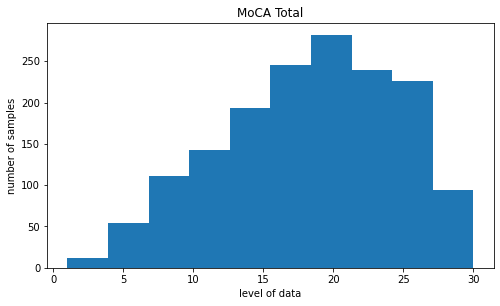

In [15]:
# check the distribution of moca features
distribution(df_moca, moca_col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


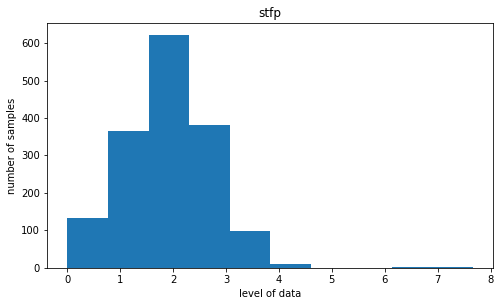

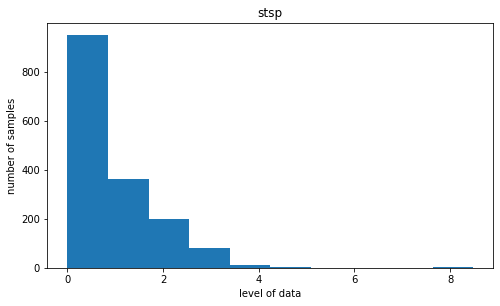

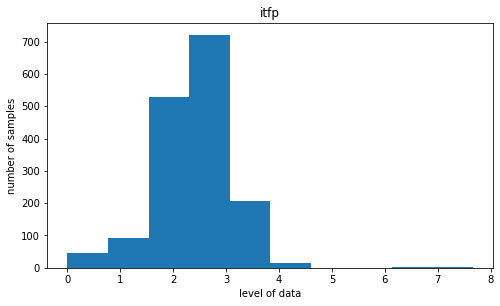

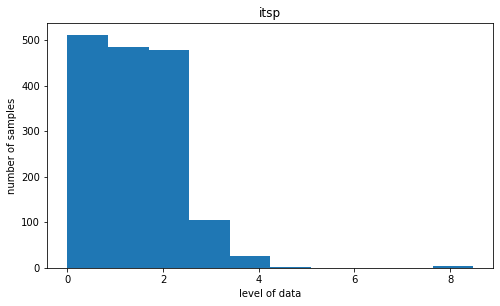

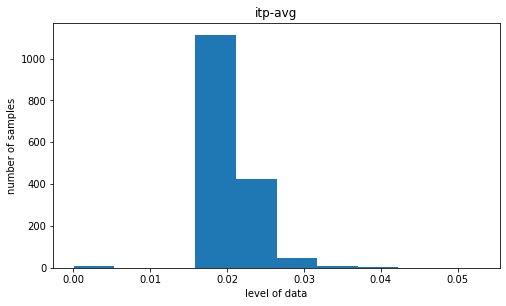

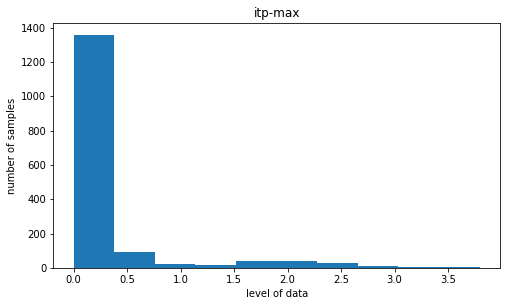

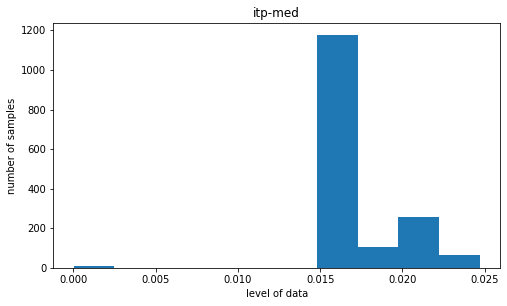

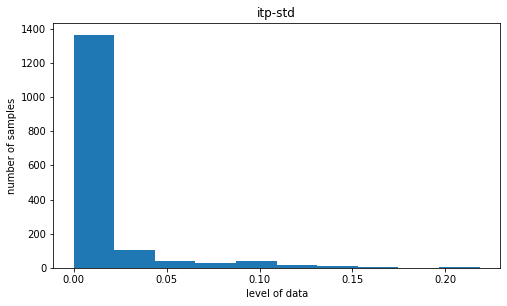

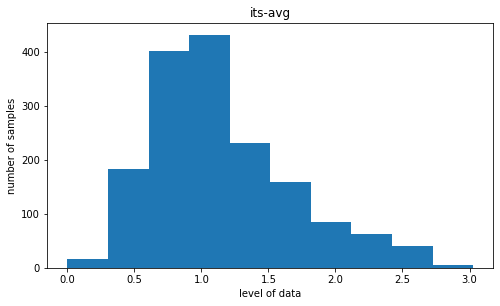

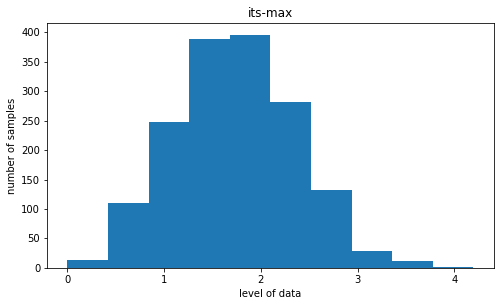

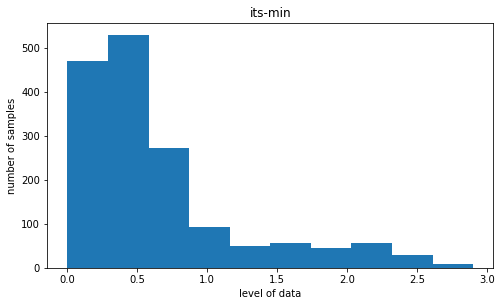

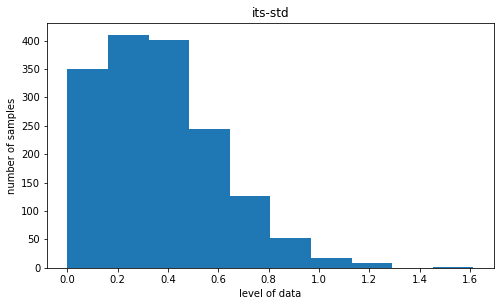

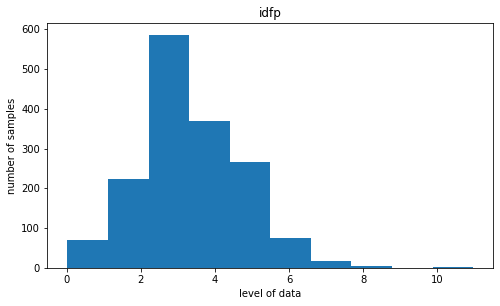

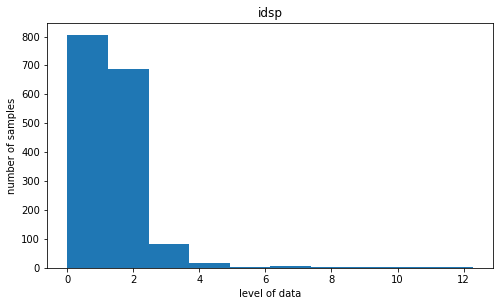

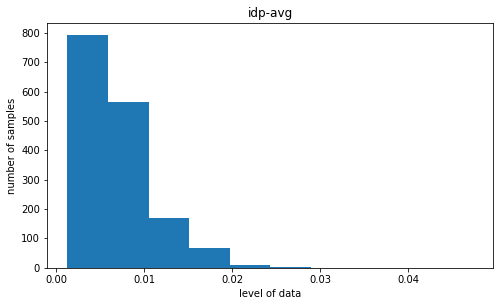

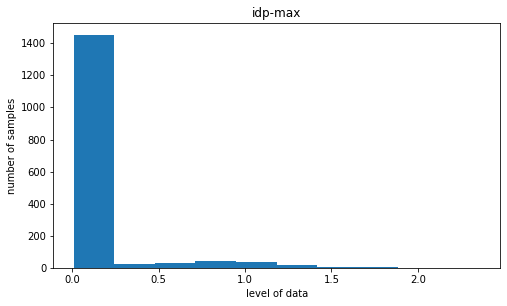

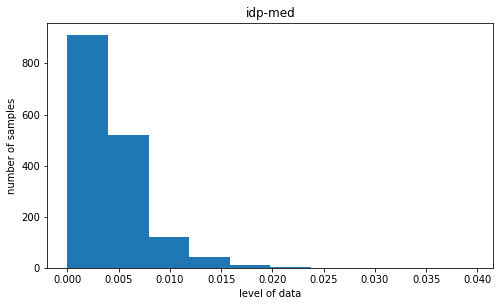

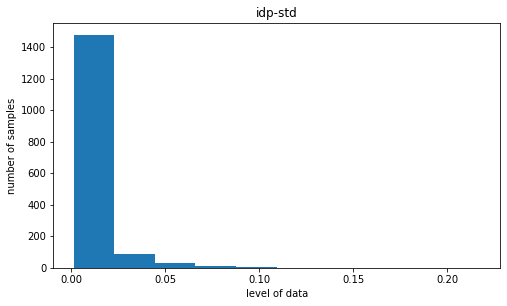

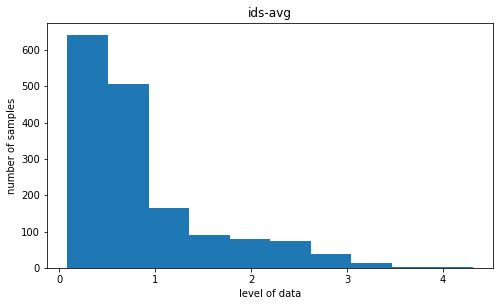

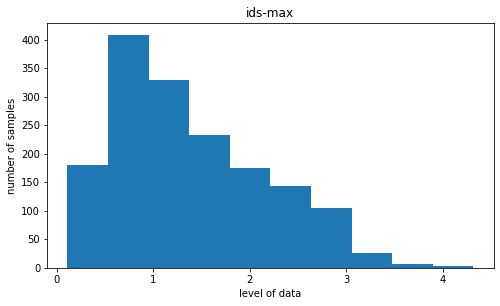

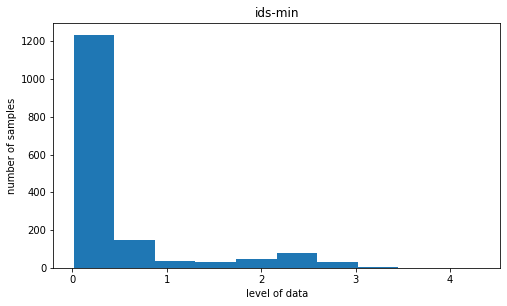

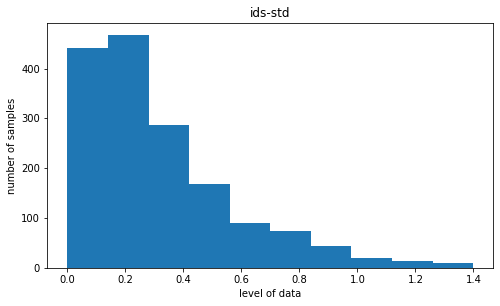

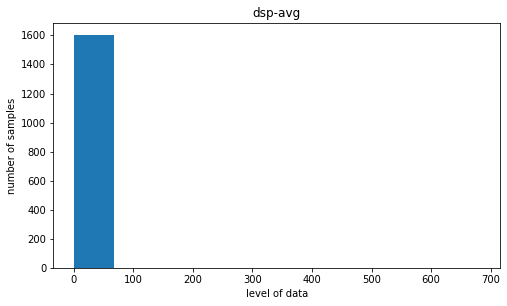

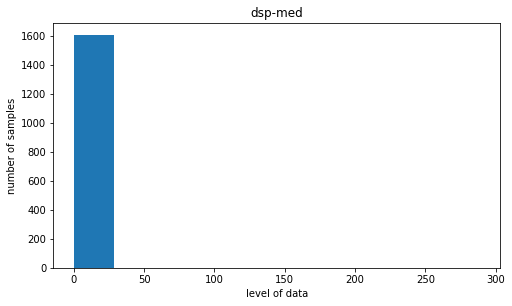

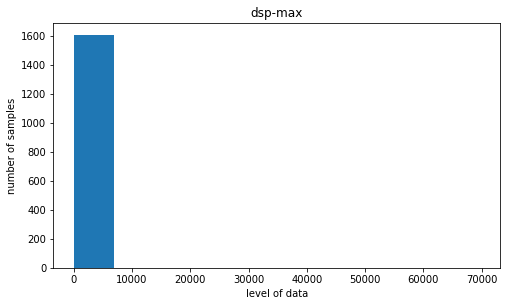

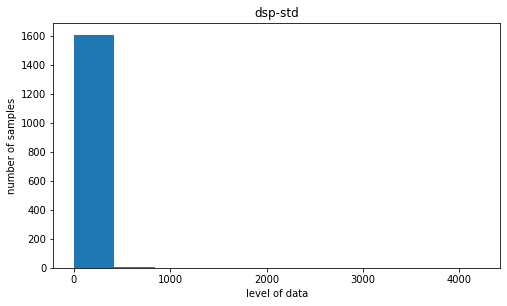

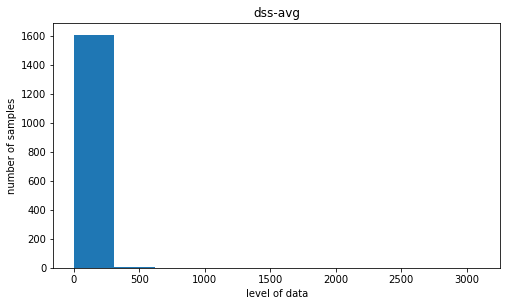

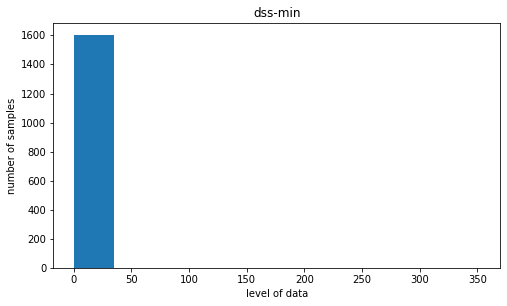

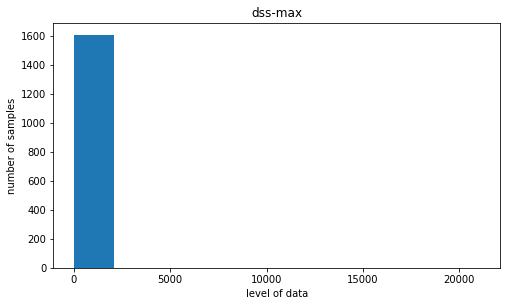

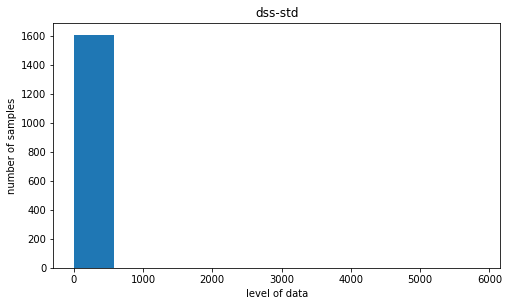

In [16]:
# check the distribution of drawing features
distribution(df_drawing, drawing_col)

Data normalization: transform the data to the same magnitude

In [17]:
# define a function to normaliza data using z-score normalization
def norm(df):
  if df.columns[-1] == 'Disease State':
    df = df.drop('Disease State', axis = 1)
  xmean = np.mean(df,0)
  std = np.std(df,0)
  return (df-xmean)/std

In [18]:
# normalize the data
df_norm_moca = norm(df_moca)
df_norm_drawing = norm(df_drawing)
df_norm_comb = norm(df_comb)

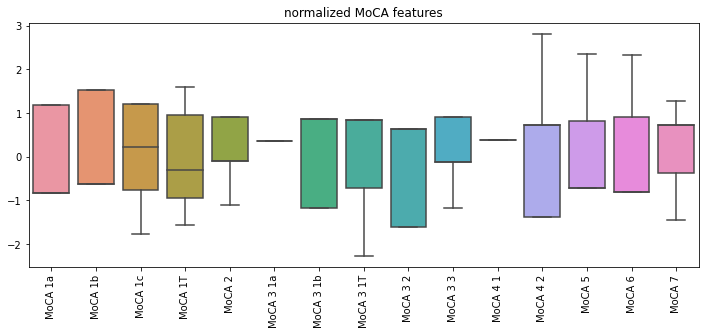

In [122]:
# show the distribution of normalized dataset
box(df_norm_moca.drop('MoCA Total', axis = 1), 'normalized MoCA features')

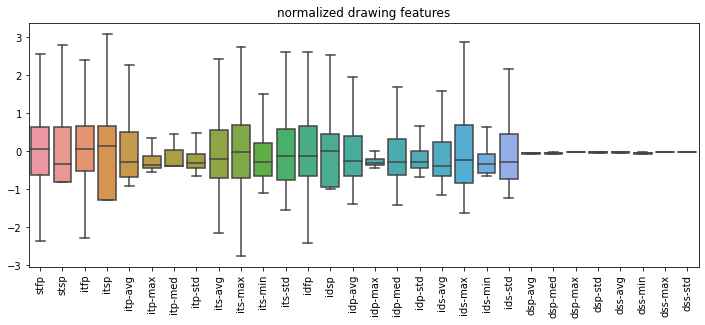

In [123]:
box(df_norm_drawing, 'normalized drawing features')

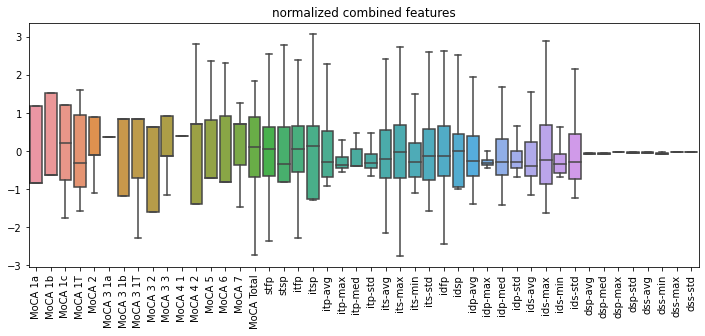

In [124]:
box(df_norm_comb, 'normalized combined features')

# Split dataset using stratified splitting

In [19]:
# define a function to generate train and test set
def data_split(df, test_size):
  # split dataset
  X = norm(df.drop('Disease State', axis = 1))
  y = df['Disease State']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y)

  # show the size of four splitted set
  print('The size of training set: {0};\nThe size of test set: {1};\nThe size of train label: {2};\nThe size of test label: {3}.\n'.
        format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

  # show the number of samples for each class in training set
  print('The number of sample for each class in training set:\n{}\n'.
        format(pd.value_counts(y_train)))

  # show the number of samples for each class in test set
  print('The number of sample for each class in test set:\n{}'.
        format(pd.value_counts(y_test)))

  return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = data_split(df_moca, 0.3)

The size of training set: (1118, 16);
The size of test set: (480, 16);
The size of train label: (1118,);
The size of test label: (480,).

The number of sample for each class in training set:
0    821
1    297
Name: Disease State, dtype: int64

The number of sample for each class in test set:
0    353
1    127
Name: Disease State, dtype: int64


In [21]:
# define a function to check the distribution of class variable
def class_var_distribution(df):
  # plot the barchart of class variable
  plt.figure(figsize=(10,6))
  g = sns.barplot(df['Disease State'], df['Disease State'], 
                  palette = 'Set1', estimator = lambda x: len(x) / len(df) )

  # graph statistics
  for p in g.patches:
          width, height = p.get_width(), p.get_height()
          x, y = p.get_xy() 
          g.text(x+width/2, 
                y+height, 
                '{:.0%}'.format(height), 
                horizontalalignment='center',fontsize=15)

  # set the label
  plt.xlabel('Disease State', fontsize=14)
  plt.ylabel('Precentage', fontsize=14)
  plt.title('Percentage of samples have/do not have dementia', fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


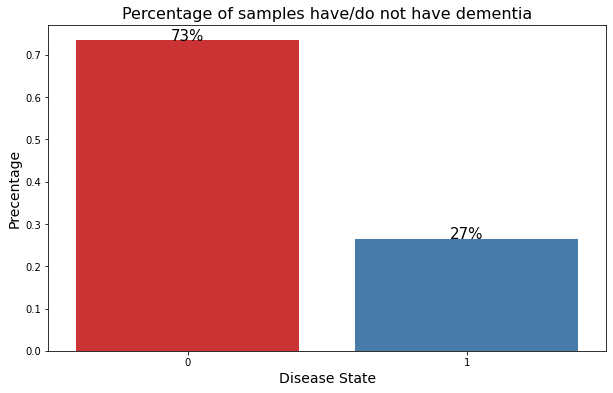

In [22]:
class_var_distribution(df_comb)

# Model training

Define evaluation metrics function

In [23]:
def evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, model):
  # accuracy
  train_acc = accuracy_score(y_train, pred_train)
  test_acc = accuracy_score(y_test, pred_test)
  print ("trainset accuracy: {0:.2f}, testset accuracy: {1:.2f}".format(train_acc, test_acc))
  
  # other three evaluation metrics: precision, sensitivity and F1-score
  if roc_set == 'train':
    precision, recall, F1, _ = precision_recall_fscore_support(y_train, pred_train, average = 'micro')
    print("precision: {0:.2f}. recall: {1:.2f}, F1-score: {2:.2f}".format(precision, recall, F1))
    CM = confusion_matrix(y_train, pred_train, labels = [0, 1])   
  elif roc_set == 'test':
    precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average = 'micro')
    print("precision: {0:.2f}. recall: {1:.2f}, F1-score: {2:.2f}".format(precision, recall, F1))
    CM = confusion_matrix(y_test, pred_test, labels = [0, 1])   

  # plot heatmap for confusion matrix
  fig, ax = plt.subplots(figsize=(8, 4.5))
  sns.heatmap(CM, fmt='.0f', cmap="Reds",
              square=True, linewidths=.5, annot=True)
  plt.title('confusion matrix')
  plt.show()
  
  # plot ROC Cruve for testset
  if roc_set == 'train':
    prob_test = model.predict_proba(X_train)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, predict_test_value)
  elif roc_set == 'test':
    prob_test = model.predict_proba(X_test)
    predict_test_value = prob_test[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, predict_test_value)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize = (8, 4.5))
  plt.title("ROC Curve")
  plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
  plt.legend(loc="lower right")
  plt.plot([0, 1], [0, 1], "r--")
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.show()

Define a function to select the important features based on permutation importance

In [24]:
def perm_importances(X, y, num_features, model):
  # prepare dataset
  index = X.columns.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

  # train the model
  model.fit(X_train, y_train)

  # select feature using permutation ranking
  perm_importance = permutation_importance(model, X_test, y_test)
  num_nonzero = np.count_nonzero(perm_importance.importances_mean)
  sorted_idx = perm_importance.importances_mean.argsort()
  plt.figure(figsize = (7.5, 4.5))
  plt.barh(index[sorted_idx][-num_features:], perm_importance.importances_mean[sorted_idx][-num_features:])
  plt.xlabel("Importance")
  plt.ylabel('important features')
  plt.title('Permutation importances')
  plt.show()

  # return selected features
  if num_nonzero > num_features:
    selected_features = index[sorted_idx][-num_features:]
  else:
    selected_features = index[sorted_idx][-num_nonzero:]

  return selected_features

Decision tree

In [25]:
# define a deciciosn tree classifier
# df: the set to classify
# roc_set: train/test  
def dt_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # train the model
  dtree = DecisionTreeClassifier(criterion="entropy", random_state=123,
                                max_depth=4,min_samples_leaf=5, 
                                class_weight = 'balanced')
  dtree.fit(X_train, y_train)
  
  # prediction
  pred_train = dtree.predict(X_train)
  pred_test = dtree.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, dtree)

  # the importances of features
  features = list(X_test.columns)
  importances = dtree.feature_importances_
  indices = np.argsort(importances)[::-1]
  num_features = len(importances)
  num_nonzero = np.count_nonzero(importances)

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, dtree)

  return features, importances, indices, num_nonzero, selected_features_permutation

In [26]:
# plot the importances of features using bar chart
def importance_barchart_dt(features, importances, indices, num_nonzero):
  plt.figure()
  plt.figure(figsize = (8, 4.5))
  plt.title("Important features")
  plt.bar(range(num_nonzero), importances[indices][:num_nonzero], color="g", align="center")
  plt.xticks(range(num_nonzero), [features[i] for i in indices[:num_nonzero]], rotation='45')
  plt.xlabel('feature')
  plt.ylabel('importance')
  plt.xlim([-1, num_nonzero])
  plt.show()

In [27]:
def show_importance(features, importances, indices):
# show importances of all features
 for i in indices:
     print ("{0} - {1:.3f}".format(features[i], importances[i]))

trainset accuracy: 0.85, testset accuracy: 0.85
precision: 0.85. recall: 0.85, F1-score: 0.85


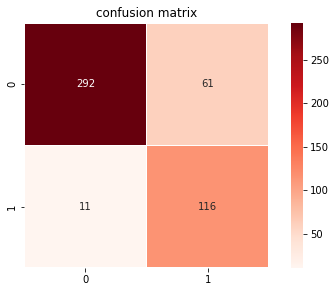

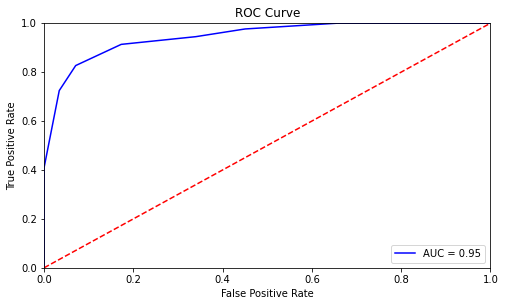

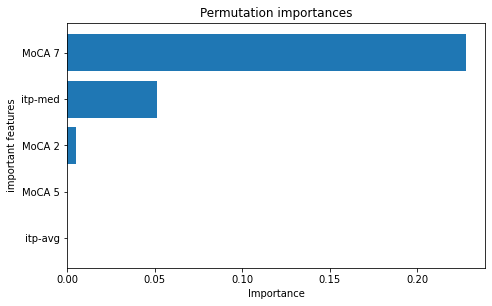

<Figure size 432x288 with 0 Axes>

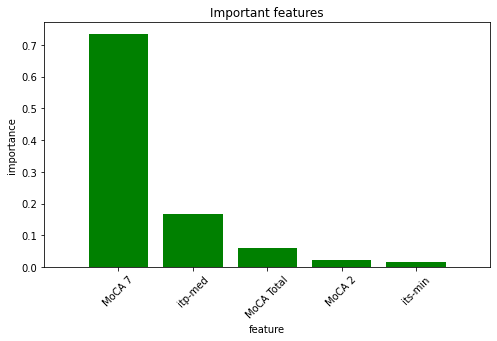

In [30]:
# train the model and show the results
features, importances, indices, num_nonzero, features_perm = dt_classifier(df_comb, 'test')
importance_barchart_dt(features, importances, indices, num_nonzero)

In [36]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,MoCA 7
1,itp-med
2,MoCA 2
3,MoCA 5


KNN

In [37]:
from sklearn.utils import class_weight
def num_nbr_selection(df, kfold):
  # prepare dataset
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State'].to_numpy()
  X = norm(X).to_numpy()

  # define 10 candidate number
  fs =[1,2,3,4,5,6,7,8,9,10]

  # perform k fold cross validation，return the index of training and test set
  n_split = kfold
  fk = KFold(n_splits = n_split, random_state=2001, shuffle=True)

  # assume 1 neigbor is the best
  best_k = fs[0]
  # define a variable to take accuracy
  best_score = 0

  # iterate over all candidate values
  for k in fs:
    # record the sum of accuracy 
    curr_score = 0
    # iterate over all folds
    for train_index,valid_index in fk.split(X):
      # define KNN model
      clf = KNeighborsClassifier(n_neighbors = k)
      # train KNN model
      clf.fit(X[train_index], y[train_index])
      # calculate the accuracy
      curr_score = curr_score + clf.score(X[valid_index], y[valid_index])
    # Calculate the average accuracy value when the K = k
    avg_score = curr_score / n_split
    print('The mean of accuracy: %.2f' % avg_score)
    # compare the accurcay
    if avg_score > best_score:
      # replace with the best accuracy
      best_score = avg_score
      # replace with the best k
      best_k = k
    print('The best K until now: %d'%best_k,"The best accuracy until now: %.2f"%best_score)
    print("*"*50)
  print('The best K based on the evaluation: %d'%best_k,"The accrucay of model with best K: %.2f"%best_score)

In [38]:
num_nbr_selection(df_moca, 10)

The mean of accuracy: 0.97
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.90
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.85
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.88
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.89
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.87
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.86
The best K until now: 1 The best accuracy until now: 0.97
**************************************************
The mean of accuracy: 0.88
The best K until now:

In [39]:
# define a KNN classifier
# df: the set to classify
# roc_set: train/test  
def knn_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # define the model
  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(X_train, y_train)
  
  # prediction
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, knn)

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, knn)

  return selected_features_permutation

trainset accuracy: 1.00, testset accuracy: 0.88
precision: 0.88. recall: 0.88, F1-score: 0.88


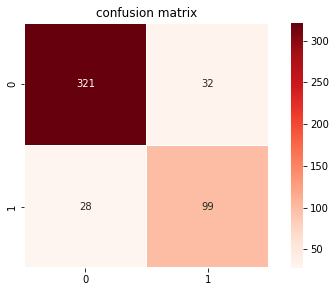

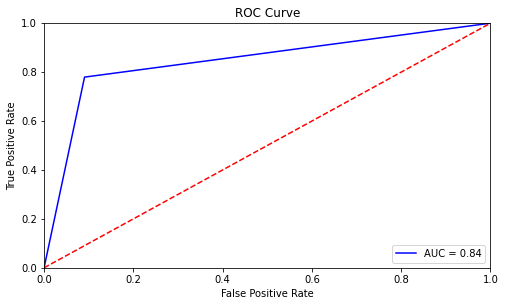

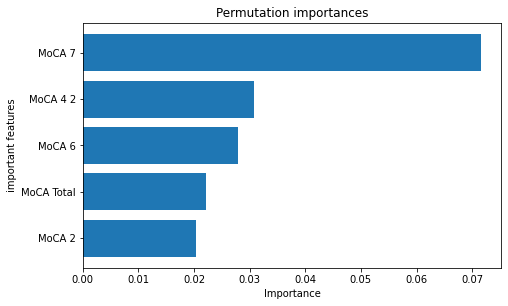

In [66]:
features_perm = knn_classifier(df_comb, 'test')

In [68]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,MoCA 7
1,MoCA 4 2
2,MoCA 6
3,MoCA Total
4,MoCA 2


Random forest

In [46]:
# define a random forest classifier
# df: the set to classify
# roc_set: train/test  
def rf_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # define the model
  forest = RandomForestClassifier(
      n_estimators=10, criterion="entropy",
      max_depth=4, min_samples_leaf=5,
      class_weight = 'balanced')
  forest.fit(X_train, y_train)
  
  # prediction
  pred_train = forest.predict(X_train)
  pred_test = forest.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, forest)

  # the importances of features
  features = list(X_test.columns)
  importances = forest.feature_importances_
  indices = np.argsort(importances)[::-1]
  num_features = len(importances)
  num_nonzero = np.count_nonzero(importances)

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, forest)

  return features, importances, indices, num_nonzero, selected_features_permutation

In [125]:
# plot the importances of features using bar chart
def importance_barchart_rf(features, importances, indices, num_nonzero):
  plt.figure()
  plt.figure(figsize = (8, 4.5))
  plt.title("Important features")
  plt.bar(range(num_nonzero), importances[indices][:num_nonzero], color="g", align="center")
  plt.xticks(range(num_nonzero), [features[i] for i in indices[:num_nonzero]], rotation='90')
  plt.xlabel('feature')
  plt.ylabel('importance')
  plt.xlim([-1, num_nonzero])
  plt.show()

trainset accuracy: 0.90, testset accuracy: 0.88
precision: 0.88. recall: 0.88, F1-score: 0.88


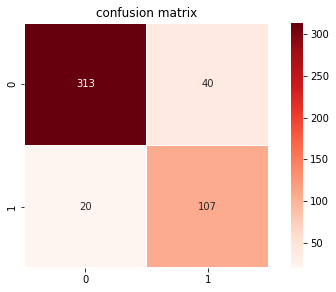

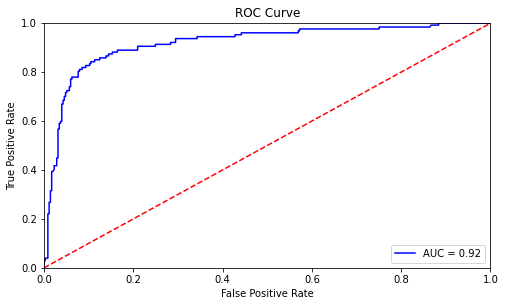

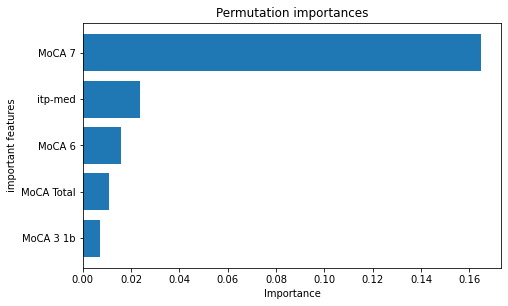

<Figure size 432x288 with 0 Axes>

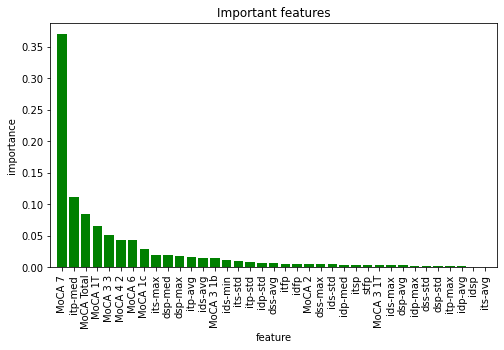

In [126]:
# train the model and show the results
features, importances, indices, num_nonzero, features_perm = rf_classifier(df_comb, 'test')
importance_barchart_rf(features, importances, indices, num_nonzero)

In [127]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,MoCA 7
1,itp-med
2,MoCA 6
3,MoCA Total
4,MoCA 3 1b


Naive Bayes 

In [69]:
# define a naive bayes classifier
# df: the set to classify
# roc_set: train/test  
# model: G/B (G: Gaussian naive bayes model, B: Bernoulli naive bayes model)
def nb_classifier(df, roc_set, model):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # define the model
  if model == 'G':
    clf = GaussianNB()
  elif model == 'B':
    clf = BernoulliNB()
  clf.fit(X_train, y_train)
  
  # prediction
  pred_train = clf.predict(X_train)
  pred_test = clf.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, clf)

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, clf)

  return selected_features_permutation

trainset accuracy: 0.74, testset accuracy: 0.74
precision: 0.74. recall: 0.74, F1-score: 0.74


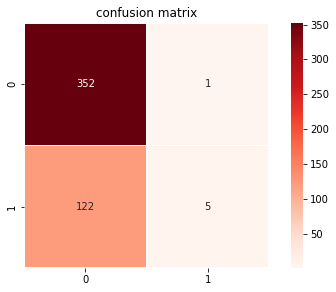

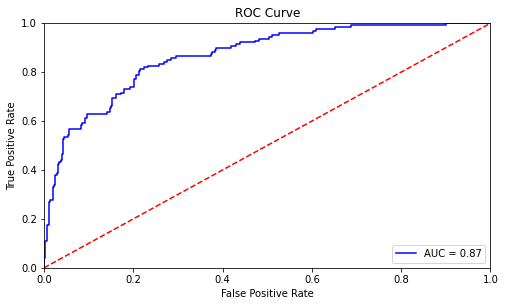

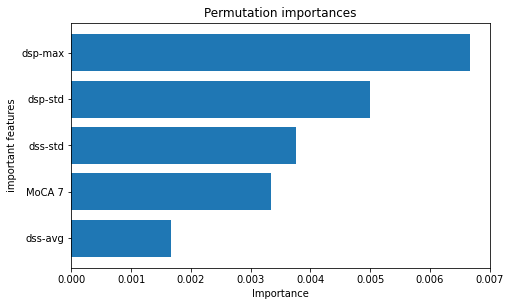

In [72]:
features_perm = nb_classifier(df_comb, 'test', 'G')

In [73]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,dsp-max
1,dsp-std
2,dss-std
3,MoCA 7
4,dss-avg


SVM

In [76]:
# define a svm classifier
# df: the set to classify
# roc_set: train/test  
def svm_classifier(df, roc_set):
  # define dataset and label
  X = df.drop(['Disease State'], axis = 1)
  y = df['Disease State']

  # normalize training set
  X = norm(X)

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
  
  # define the model
  svc = svm.SVC(kernel = 'linear', probability = True, class_weight = 'balanced')
  svc.fit(X_train, y_train)
  
  # prediction
  pred_train = svc.predict(X_train)
  pred_test = svc.predict(X_test)
 
  # perform evaluation
  evalutaion(X_train, X_test, y_train, y_test, pred_train, pred_test, roc_set, svc)

  # select important feature based on permutation importance
  selected_features_permutation = perm_importances(X, y, 5, svc)

  return selected_features_permutation

trainset accuracy: 0.92, testset accuracy: 0.89
precision: 0.89. recall: 0.89, F1-score: 0.89


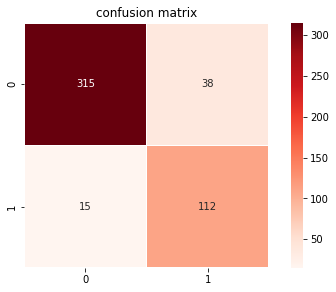

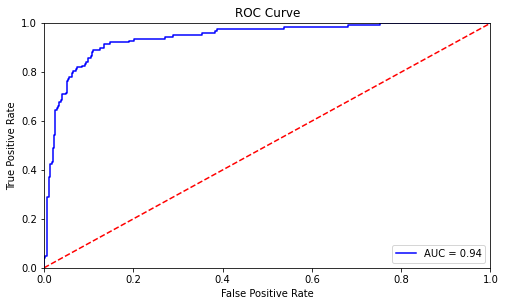

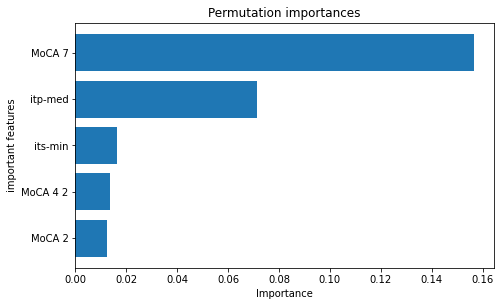

In [80]:
features_perm = svm_classifier(df_comb, 'test')

In [81]:
df_important_features = pd.DataFrame(features_perm[::-1])
df_important_features

,0
0,MoCA 7
1,itp-med
2,its-min
3,MoCA 4 2
4,MoCA 2
